In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import graphviz 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



In [55]:
MyDataSet=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')
MyDataSet.head()

,Unnamed: 0,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [56]:
MyDataSet=MyDataSet.drop(['Unnamed: 0'],axis=1)

In [57]:
confidence_level = 0.05
MyDataSet['VaR_5_percent'] = MyDataSet['oil_return'].rolling(window=10).quantile(confidence_level)

In [58]:
MyDataSet['return_lag_1'] = MyDataSet['oil_return'].shift(1)
MyDataSet['return_lag_2'] = MyDataSet['oil_return'].shift(2)
MyDataSet['return_lag_3'] = MyDataSet['oil_return'].shift(3)

In [59]:
MyDataSet['VaR_5_percent_lag1'] = MyDataSet['VaR_5_percent'].shift(1)
MyDataSet['VaR_5_percent_lag2'] = MyDataSet['VaR_5_percent'].shift(2)
MyDataSet['VaR_5_percent_lag3'] = MyDataSet['VaR_5_percent'].shift(3)

In [60]:
MyDataSet.dropna(inplace=True)

In [8]:
###########for gaussian and Berno
X = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','VaR_5_percent_lag1','VaR_5_percent_lag2','VaR_5_percent_lag3'], axis= 1)
scaler = StandardScaler()
X=scaler.fit_transform(X)


In [73]:
################for MN
X_MN= MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','VaR_5_percent_lag1','VaR_5_percent_lag2','VaR_5_percent_lag3'], axis= 1)
scaler_MN = MinMaxScaler()
x_scaled = scaler_MN.fit_transform(X_MN)

In [62]:
X_var = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','return_lag_1','return_lag_2','return_lag_3'], axis= 1)
scaler = StandardScaler()
X_var=scaler.fit_transform(X_var)


In [ ]:
################for MN
X_MN_var = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','return_lag_1','return_lag_2','return_lag_3'], axis= 1)
x_scaled_var = scaler_MN.fit_transform(X_MN_var)

In [11]:
Y=MyDataSet['oil_return']
Y_var=MyDataSet['VaR_5_percent']

In [12]:
threshold = np.median(Y)
threshold_var=np.median(Y_var)

In [13]:
Y_binary = (Y> threshold).astype(int)
Y_binary_var=(Y_var> threshold_var).astype(int)

Bernoulli

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y_binary,test_size =0.3)
x_train_var,x_test_var,y_train_var,y_test_var = train_test_split(X_var,Y_binary_var,test_size =0.3)

In [15]:
BNB = BernoulliNB()

In [16]:
BNB_Model = BNB.fit(x_train, y_train)
print(BNB_Model)
print(BNB_Model.classes_)

BernoulliNB()
[0 1]


In [17]:
BNB_Model_var = BNB.fit(x_train_var, y_train)
print(BNB_Model_var)
print(BNB_Model_var)

BernoulliNB()
BernoulliNB()


In [18]:
## Predict the Testing Data using the model
Predictions_B=BNB_Model.predict(x_test)
print(Predictions_B)

[1 1 1 ... 1 1 0]


In [19]:
Predictions_B_var=BNB_Model_var.predict(x_test_var)
print(Predictions_B_var)

[1 1 0 ... 0 0 0]


In [20]:
## Confusion Matrix
CM_B = confusion_matrix(y_test, Predictions_B)
print(CM_B)

[[423 504]
 [405 469]]


In [21]:
CM_B_var = confusion_matrix(y_test_var, Predictions_B_var)
print(CM_B_var)

[[480 407]
 [143 771]]


<Axes: >

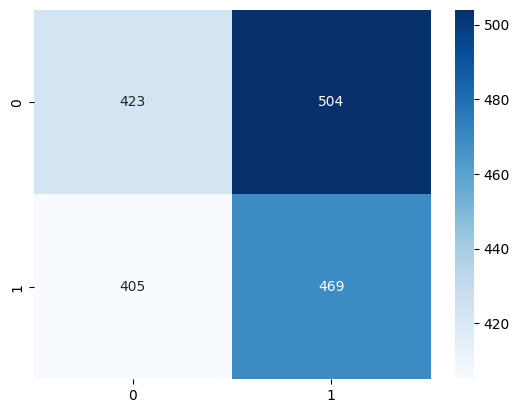

In [22]:
sns.heatmap(CM_B, annot=True,fmt='g' , cmap='Blues')

<Axes: >

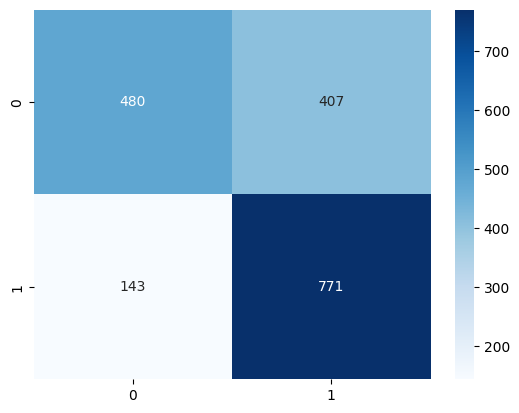

In [23]:
sns.heatmap(CM_B_var, annot=True,fmt='g' , cmap='Blues')

In [24]:
accuracy = accuracy_score(y_test, Predictions_B)
print("Accuracy:", accuracy)

Accuracy: 0.49528039977790117


In [25]:
accuracy_var = accuracy_score(y_test_var, Predictions_B_var)
print("Accuracy:", accuracy_var)

Accuracy: 0.6946141032759579


Gaussian Naive Bayes

In [26]:
GNB = GaussianNB()

In [27]:
GNB_Model = GNB.fit(x_train, y_train)

In [28]:
GNB_Model_var = GNB.fit(x_train_var, y_train_var)

In [29]:
Predictions_G=GNB_Model.predict(x_test)
print(Predictions_G)

[1 0 1 ... 1 0 0]


In [30]:
Predictions_G_var=GNB_Model_var.predict(x_test_var)
print(Predictions_G_var)

[1 1 0 ... 0 0 0]


In [31]:
CM_G = confusion_matrix(y_test, Predictions_G)
print(CM_G)

[[366 561]
 [325 549]]


In [32]:
CM_G_var = confusion_matrix(y_test_var, Predictions_G_var)
print(CM_G_var)

[[562 325]
 [ 45 869]]


<Axes: >

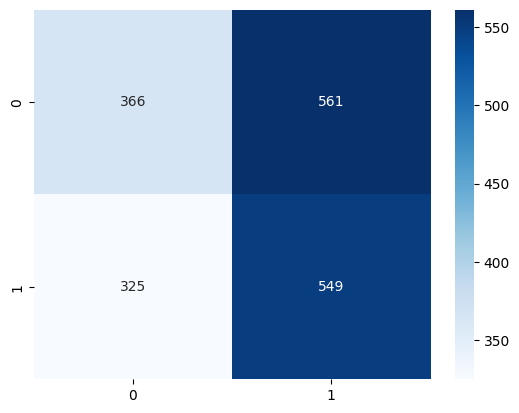

In [33]:
sns.heatmap(CM_G, annot=True,fmt='g' , cmap='Blues')

<Axes: >

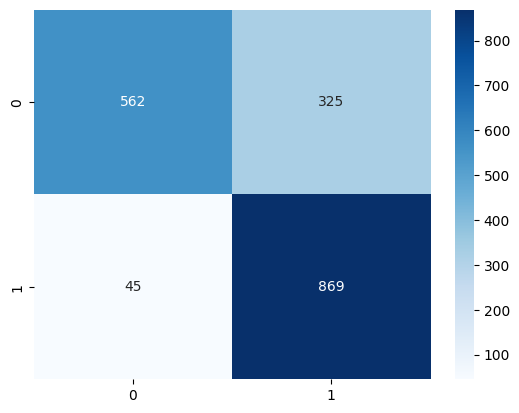

In [34]:
sns.heatmap(CM_G_var, annot=True,fmt='g' , cmap='Blues')

In [35]:
accuracy = accuracy_score(y_test, Predictions_G)
print("Accuracy:", accuracy)

Accuracy: 0.5080510827318157


In [36]:
accuracy_var = accuracy_score(y_test_var, Predictions_G_var)
print("Accuracy:", accuracy_var)

Accuracy: 0.7945585785674625


Multinomial Naive Bayes

In [74]:
x_scaled_train,x_scaled_test,y_train,y_test = train_test_split(x_scaled,Y_binary,test_size =0.3)
x_scaled_train_var,x_scaled_test_var,y_train_var,y_test_var = train_test_split(x_scaled_var,Y_binary_var,test_size =0.3)

In [75]:
MN = MultinomialNB()

In [76]:
MN_Model = MN.fit(x_scaled_train, y_train)

In [77]:
MN_Model_var = MN.fit(x_scaled_train_var, y_train)

In [78]:
Predictions_MN=MN_Model.predict(x_scaled_test)
print(Predictions_MN)

[0 1 1 ... 1 1 1]


In [79]:
Predictions_MN_var=MN_Model.predict(x_scaled_test_var)
print(Predictions_MN_var)

[1 0 0 ... 0 0 0]


In [80]:
CM_MN = confusion_matrix(y_test, Predictions_MN)
print(CM_MN)

[[ 97 800]
 [124 780]]


In [81]:
CM_MN_var = confusion_matrix(y_test_var, Predictions_MN_var)
print(CM_MN_var)

[[723 172]
 [824  82]]


<Axes: >

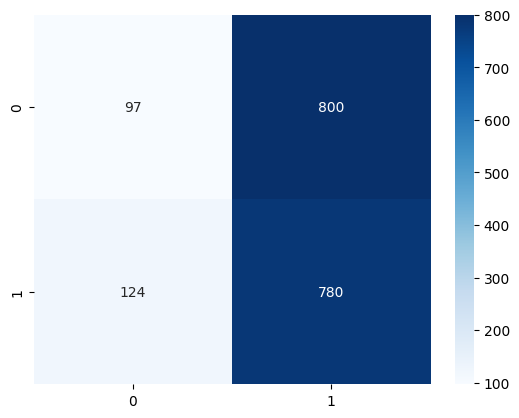

In [82]:
sns.heatmap(CM_MN, annot=True,fmt='g' , cmap='Blues')

<Axes: >

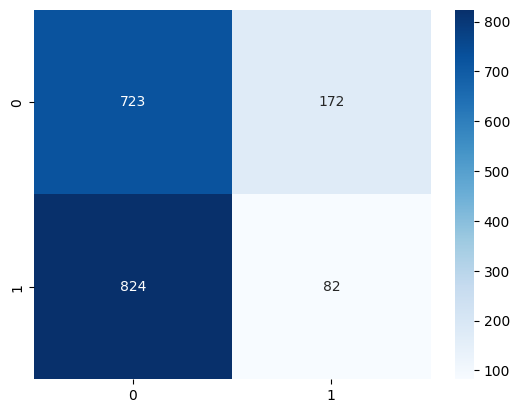

In [83]:
sns.heatmap(CM_MN_var, annot=True,fmt='g' , cmap='Blues')

In [84]:
accuracy = accuracy_score(y_test, Predictions_MN)
print("Accuracy:", accuracy)

Accuracy: 0.4869516935036091


In [85]:
accuracy_var = accuracy_score(y_test_var, Predictions_MN_var)
print("Accuracy:", accuracy_var)

Accuracy: 0.4469739033870072
